# Week 3 Homework

Utilize the scikit-learn California Housing dataset for the following exercise  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [155]:
import postgresql
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

## 1. Download the dataset and build DataFrames for X and y

In [156]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing

In [157]:
data = fetch_california_housing()
print(data.target_names)
print(data.feature_names)

['MedHouseVal']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [158]:
df1 = pd.DataFrame(data = np.c_[data['data'],data['target']],
columns = data['feature_names'] + ['target'])
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 2. Are there columns that look like they need a type change?

In [159]:
df1.dtypes
print('We can see that no change is needed')

We can see that no change is needed


## 3. Split your data into training and testing datasets

In [160]:
#Dropping nas
df1 = df1.dropna()
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [161]:
# We need X and Y
x_df1 = df1.drop(columns = ['target'])    
y_df1 = df[['target']]

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x_df1, y_df1)

## 4. Build a K-NN Regressor and fit it

In [163]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

StandardScaler()

## 5. Try several different parameter values, especially for number of neighbors.  Keep the optimal result that you encounter while testing.

In [165]:
#5 Neighbor Model
clf = KNeighborsRegressor(n_neighbors = 5)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6828114195172247

In [166]:
#10 Neighbor Model
clf = KNeighborsRegressor(n_neighbors = 10)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.688573792090673

In [167]:
#15 Neighbor Model
clf = KNeighborsRegressor(n_neighbors = 15)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6870404159042247

In [168]:
#20 Neighbor Model
clf = KNeighborsRegressor(n_neighbors = 20)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6845429735582252

## 6. Determing model accuracy or efficacy is slightly harder with a regression.  What is your mean absolute error from the model (keep in mind the age of the dataset when thinking about prices)?

In [169]:
y_pred = clf.predict(x_test)
mean_absolute_error(y_test, y_pred)

0.45073755348837213

## 7. Chart your predictions vs the actuals.

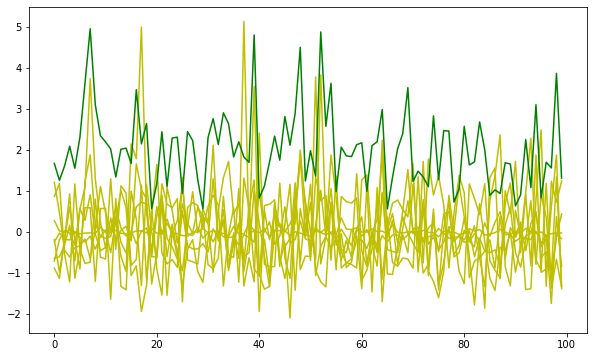

In [170]:
plt.plot(x_test[:100], 'y')
plt.plot(y_pred[:100], 'g')
plt.rcParams['figure.figsize'] = [10,6]
plt.show()